## **Data Visualization using Matplotlib**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_org = sns.load_dataset('titanic') 
df_org.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df_org['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

#Bar Chart


Text(0, 0.5, 'Count')

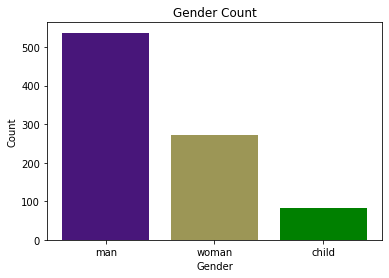

In [ ]:
who = df_org['who'].value_counts().to_frame().reset_index()
x = who['index']
y = who['who']
plt.bar(who['index'],who['who'],color = ['#48167a','#9c9656','green'])
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count') 


In [ ]:
who

,index,who
0,man,537
1,woman,271
2,child,83


([<matplotlib.patches.Wedge at 0x7ffaaadfbc50>,
 [Text(-0.3487593016911999, 1.0432482683828748, 'man'),
  Text(0.03296249724279082, -1.0995060135240367, 'woman'),
  Text(1.0532306714066144, -0.3173407518872612, 'child')])

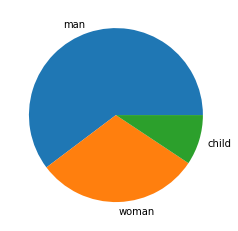

In [ ]:
plt.pie(who['who'],labels = who['index'])

Text(0.5, 0, 'Count')

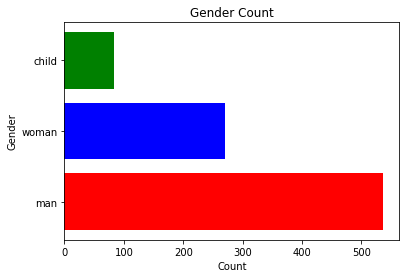

In [ ]:
plt.barh(who['index'],who['who'],color = ['red','blue','green'])
plt.title('Gender Count')
plt.ylabel('Gender')
plt.xlabel('Count') 

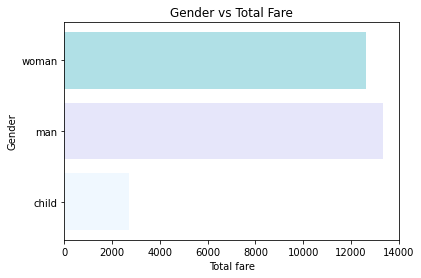

In [ ]:
df=df_org.groupby('who')['fare'].sum().to_frame().reset_index()

 
plt.barh(df['who'],df['fare'],color = ['#F0F8FF','#E6E6FA','#B0E0E6']) 

plt.title('Gender vs Total Fare')
plt.xlabel('Total fare')
plt.ylabel('Gender') 

plt.show()

In [ ]:
df_pivot = pd.pivot_table(df_org, values="fare",index="who",columns="class", aggfunc=np.sum)
df_pivot


class,First,Second,Third
who,,,
child,836.2958,538.1542,1346.7710
man,7848.1792,1886.3583,3617.5281
woman,9492.9375,1377.3292,1750.3960


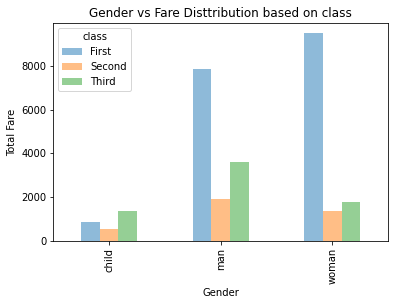

In [ ]:
df_pivot.plot(kind="bar",alpha=0.5)

plt.title('Gender vs Fare Disttribution based on class')
plt.xlabel('Gender')
plt.ylabel('Total Fare') 

plt.show()

In [ ]:
df_fare_class = df_org.groupby('class')['fare'].sum().to_frame().reset_index()
df_fare_class

,class,fare
0,First,18177.4125
1,Second,3801.8417
2,Third,6714.6951


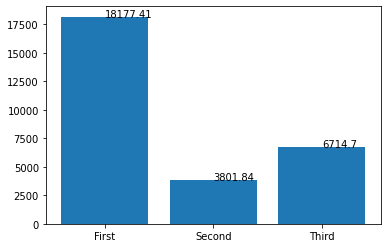

In [ ]:
plt.bar(df_fare_class['class'],df_fare_class['fare'])
for i,j in zip(df_fare_class['class'],round(df_fare_class['fare'],2)):
  plt.annotate(str(j),(i,j+2))
#plt.ylim(5000,)

(5000.0, 18000.0)

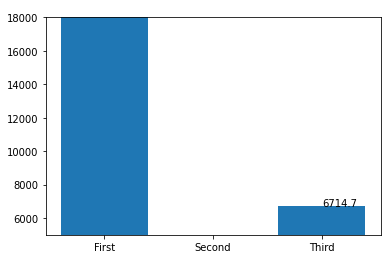

In [ ]:
plt.bar(df_fare_class['class'],df_fare_class['fare'])
for i,j in zip(df_fare_class['class'],round(df_fare_class['fare'],2)):
  plt.annotate(str(j),(i,j+2))
plt.ylim(5000,18000)


## Mosaic Chart


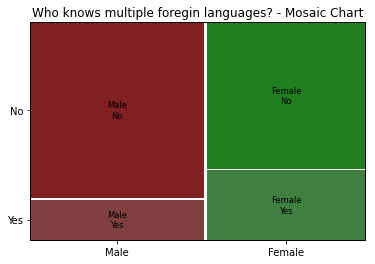

In [ ]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import pylab
from itertools import product
import numpy as np
rand = np.random.random
speaks_mul_foreign_languages = list(product(['Male', 'Female'], ['Yes', 'No']))
index = pd.MultiIndex.from_tuples(speaks_mul_foreign_languages, names=['male', 'female'])
data = pd.Series(rand(4), index=index)
mosaic(data, gap=0.01, title='Who knows multiple foregin languages? - Mosaic Chart')
pylab.show()

##Pareto Chart

In [ ]:
df_fare_class

,class,fare
0,First,18177.4125
1,Second,3801.8417
2,Third,6714.6951


In [ ]:
df_org

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data

male    female
male    yes       0.813154
        no        0.599318
female  yes       0.612585
        no        0.680172
dtype: float64

In [ ]:
df = pd.DataFrame({"error": [92, 83, 76, 59, 53, 27, 16, 9, 7, 4, 3, 1]})
df.index = ["Dose missed", "Wrong time", "Wrong drug", "Over dose", "Wrong patient", "Wrong route", "Wrong calculation", "Duplicated drugs", "Under dose", "Wrong IV rate", "Technique error", "Unauthorized drug"]
df = df.sort_values(by='error', ascending=False)
df["cum_percentage"] = round(df["error"].cumsum()/df["error"].sum()*100,2)

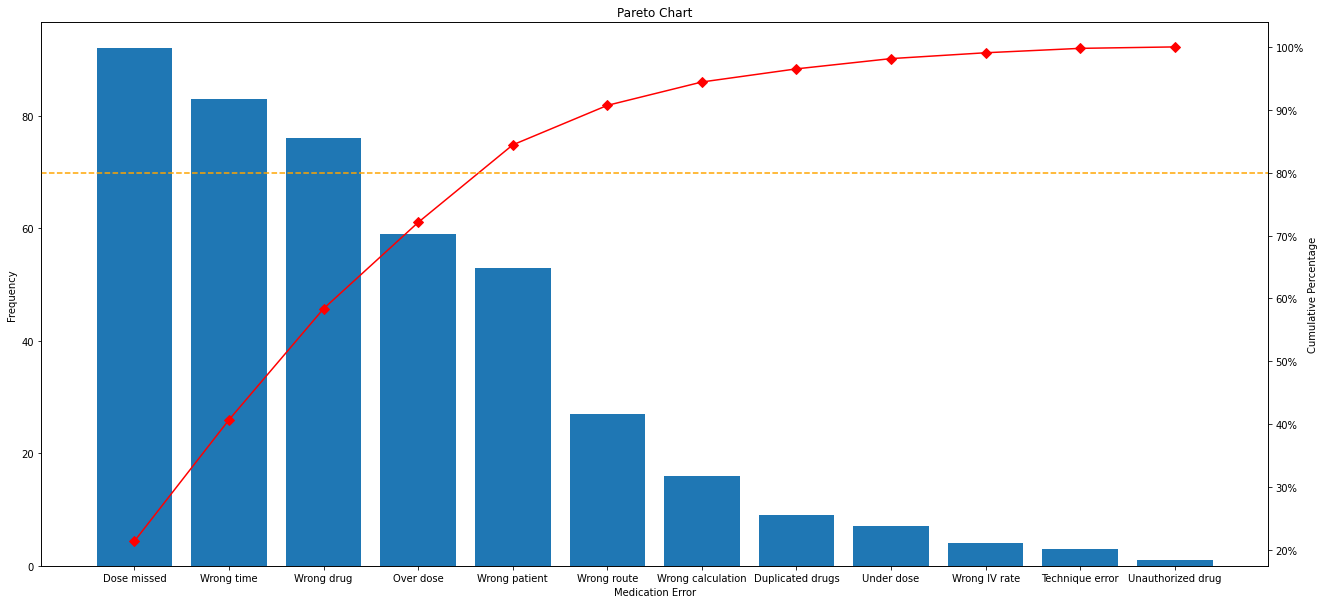

In [ ]:
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(22,10))
ax.bar(df.index, df["error"])
ax.set_title("Pareto Chart")
ax.set_xlabel("Medication Error")
ax.set_ylabel("Frequency");
ax2 = ax.twinx()
ax2.plot(df.index, df["cum_percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

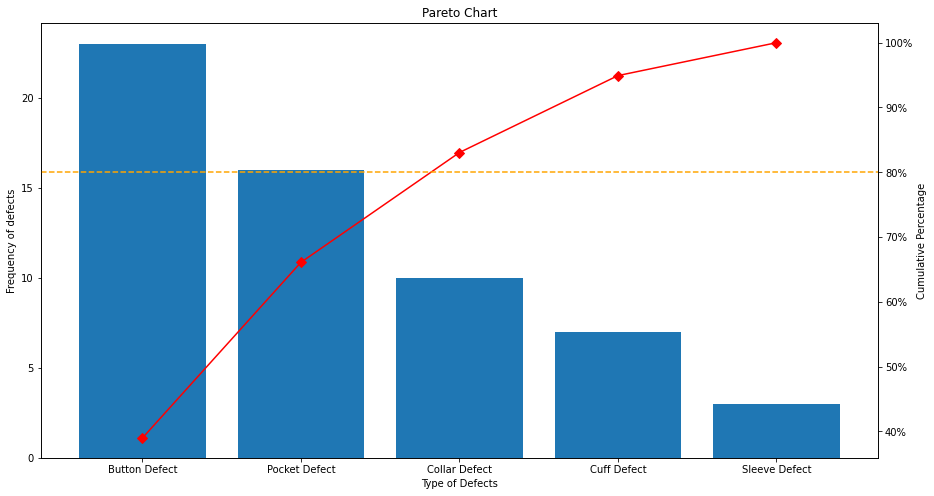

In [ ]:
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(df.index, df["defect"])
ax.set_title("Pareto Chart")
ax.set_xlabel("Type of Defects")
ax.set_ylabel("Frequency of defects");
ax2 = ax.twinx()
ax2.plot(df.index, df["cum_percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

##Waterfall chart

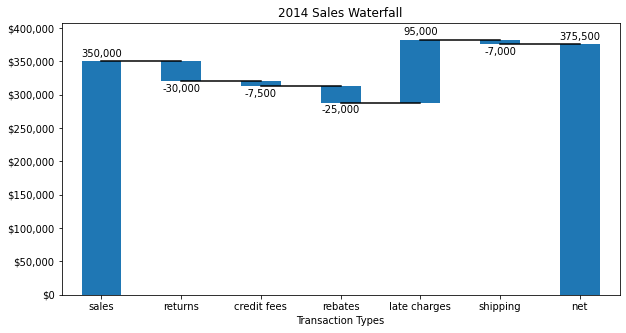

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Use python 2.7+ syntax to format currency
def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)
formatter = FuncFormatter(money)

#Data to plot. Do not include a total, it will be calculated
index = ['sales','returns','credit fees','rebates','late charges','shipping']
data = {'amount': [350000,-30000,-7500,-25000,95000,-7000]}

#Store data and create a blank series to use for the waterfall
trans = pd.DataFrame(data=data,index=index)
blank = trans.amount.cumsum().shift(1).fillna(0)

#Get the net total number for the final element in the waterfall
total = trans.sum().amount
trans.loc["net"]= total
blank.loc["net"] = total

#The steps graphically show the levels as well as used for label placement
step = blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3] = np.nan

#When plotting the last element, we want to show the full bar,
#Set the blank to 0
blank.loc["net"] = 0

#Plot and label
my_plot = trans.plot(kind='bar', stacked=True, bottom=blank,legend=None, figsize=(10, 5), title="2014 Sales Waterfall")
my_plot.plot(step.index, step.values,'k')
my_plot.set_xlabel("Transaction Types")

#Format the axis for dollars
my_plot.yaxis.set_major_formatter(formatter)

#Get the y-axis position for the labels
y_height = trans.amount.cumsum().shift(1).fillna(0)

#Get an offset so labels don't sit right on top of the bar
max = trans.max()
neg_offset = max / 25
pos_offset = max / 50
plot_offset = int(max / 15)

#Start label loop
loop = 0
for index, row in trans.iterrows():
    # For the last item in the list, we don't want to double count
    if row['amount'] == total:
        y = y_height[loop]
    else:
        y = y_height[loop] + row['amount']
    # Determine if we want a neg or pos offset
    if row['amount'] > 0:
        y += pos_offset
    else:
        y -= neg_offset
    my_plot.annotate("{:,.0f}".format(row['amount']),(loop,y),ha="center")
    loop+=1

#Scale up the y axis so there is room for the labels
my_plot.set_ylim(0,blank.max()+int(plot_offset))
#Rotate the labels
my_plot.set_xticklabels(trans.index,rotation=0)
my_plot.get_figure().savefig("waterfall.png",dpi=200,bbox_inches='tight')

In [ ]:
df_pivot.index

Index(['child', 'man', 'woman'], dtype='object', name='who')

##Sunburst Diagram

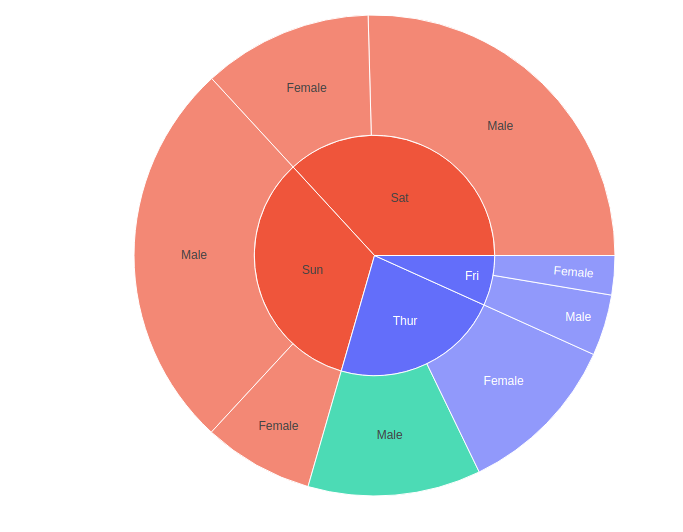

##Violin Plot

In [ ]:
import seaborn as sns 
data = sns.load_dataset('iris')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



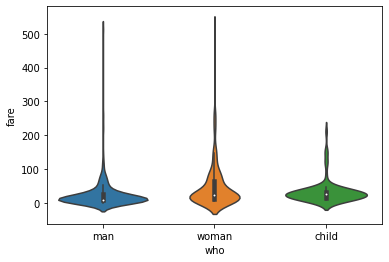

In [ ]:
sns.violinplot(df_org['who'],df_org['fare'])

In [ ]:

df = pd.DataFrame({"defect": [23,16,10,7,3]})
df['Defect Type'] = ["Button Defect", "Pocket Defect", "Collar Defect", "Cuff Defect", "Sleeve Defect" ]
df = df.sort_values(by='defect', ascending=False)
df["cum_percentage"] = round(df["defect"].cumsum()/df["defect"].sum()*100,2)
df.style

,defect,Defect Type,cum_percentage
0,23,Button Defect,38.980000
1,16,Pocket Defect,66.100000
2,10,Collar Defect,83.050000
3,7,Cuff Defect,94.920000
4,3,Sleeve Defect,100.000000


##Arc Diagram

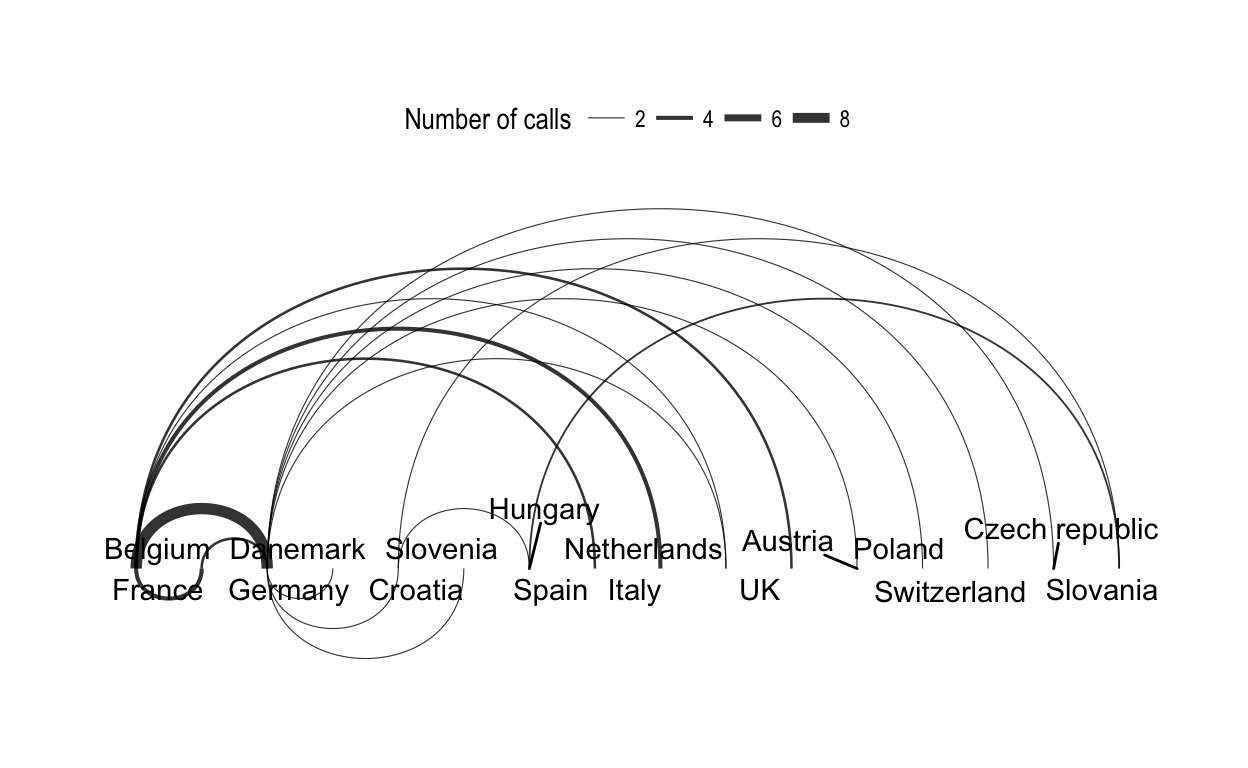

##Bell Curve

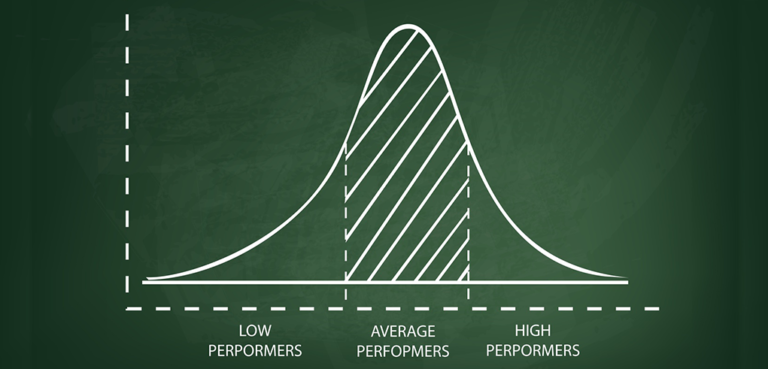

In [ ]:
import seaborn as sns 
data = sns.load_dataset('iris')

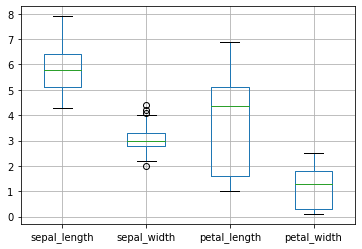

In [ ]:
data.boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x7f092063c590>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0920658750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f09205f1290>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f09205f1350>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0920652950>,
  <matplotlib.lines.Line2D at 0x7f0920658f50>]}

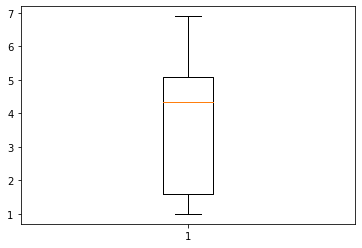

In [ ]:
plt.boxplot(data['petal_length'])

In [ ]:
pip install stemgraphic

     |████████████████████████████████| 61 kB 454 kB/s 


(<Figure size 540x180 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fde060cb510>)

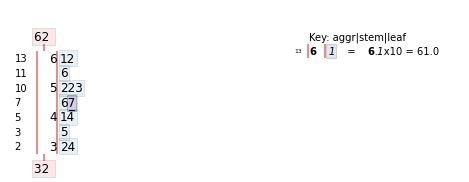

In [ ]:
x = [32, 34, 35, 41, 44, 46, 47, 52, 52, 53, 56, 61, 62]
import stemgraphic

#create stem-and-leaf plot
stemgraphic.stem_graphic(x)

(<Figure size 540x1134 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7fde01278e50>)

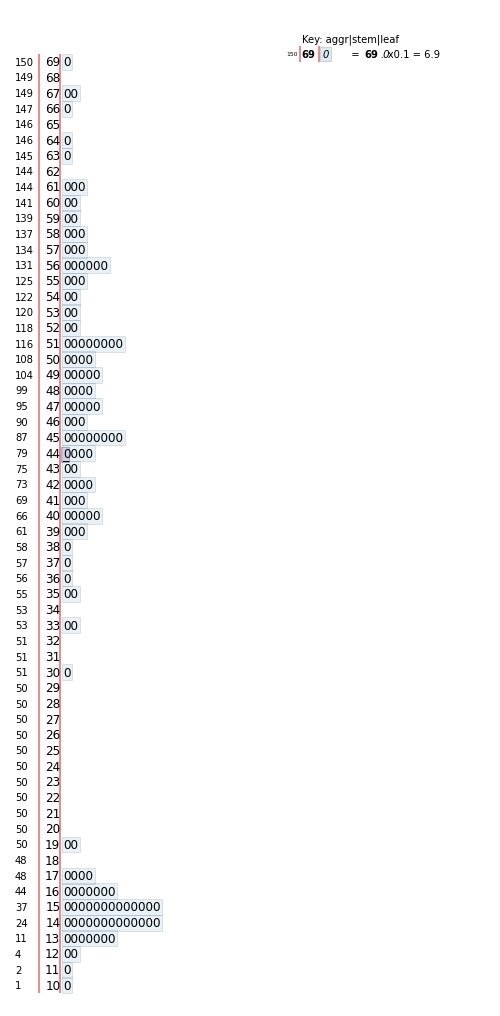

In [ ]:
stemgraphic.stem_graphic(data['petal_length'])

In [ ]:
import pandas as pd 
df = pd.DataFrame({"error": [92, 83, 76, 59, 53, 27, 16, 9, 7, 4, 3, 1]})
df.index = ["Dose missed", "Wrong time", "Wrong drug", "Over dose", "Wrong patient", "Wrong route", "Wrong calculation", "Duplicated drugs", "Under dose", "Wrong IV rate", "Technique error", "Unauthorized drug"]

In [ ]:
print(df)

                   error
Dose missed           92
Wrong time            83
Wrong drug            76
Over dose             59
Wrong patient         53
Wrong route           27
Wrong calculation     16
Duplicated drugs       9
Under dose             7
Wrong IV rate          4
Technique error        3
Unauthorized drug      1


In [ ]:
df['CUM SUM'] = df['error'].cumsum()

In [ ]:
print(df)

                   error  CUM SUM
Dose missed           92       92
Wrong time            83      175
Wrong drug            76      251
Over dose             59      310
Wrong patient         53      363
Wrong route           27      390
Wrong calculation     16      406
Duplicated drugs       9      415
Under dose             7      422
Wrong IV rate          4      426
Technique error        3      429
Unauthorized drug      1      430


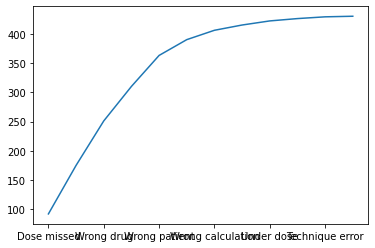

In [ ]:
df['CUM SUM'].plot()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



(-0.6400000000000001, 4.640000000000001, 0.0, 24.15)

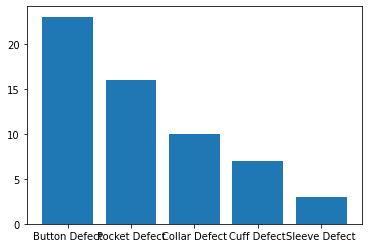

In [ ]:
plt.bar(df['Defect Type'],df['defect'])
plt.axis(ylim = (0,30) , emit = "equal")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



(0.0, 1.0, 0.0, 1.0)

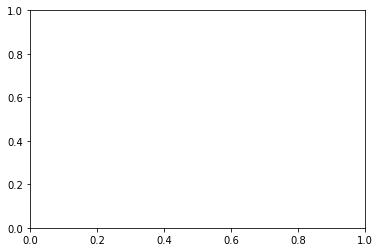

In [ ]:
plt.axis(ylim = (0,30) , emit = "equal")

In [ ]:
print(df)

   defect    Defect Type  cum_percentage
0      23  Button Defect           38.98
1      16  Pocket Defect           66.10
2      10  Collar Defect           83.05
3       7    Cuff Defect           94.92
4       3  Sleeve Defect          100.00


([<matplotlib.axis.XTick at 0x7fddff6ca410>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E')])

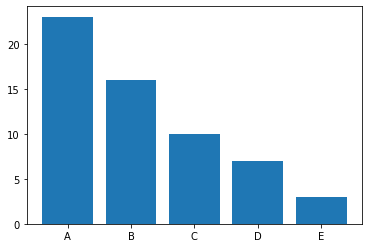

In [ ]:
plt.bar(df['Defect Type'],df['defect'])
plt.xticks([0,1,2,3,4],['A','B','C','D','E'])

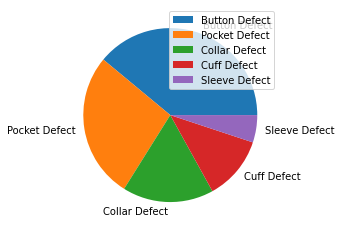

In [ ]:
plt.pie(df['defect'], labels= df['Defect Type'])
plt.legend(loc = 'upper right')